# Kickstarter-Campaign-Analysis

In 2018, 378661 projects were created in 23 different countries around the world with 15 different categories. 

The most successful country is the United States with 109379 projects, followed by Great Britain, Canada, Australia, and Germany with 12081, 4137, 2011, and 937 respectively. 

If you are going to start a Kickstarter project you need to know that 52.2% of the projects failed in 2018, but, don’t be sad, 35.37% of the projects have succeeded, the other 12.41% of projects were canceled, undefined, suspended or live in the moment of taking the data. 

As I said before, there are 15 different main categories, the most frequent in Kickstarter are Film and video, Music, Publishing, games, and Technology respectively for the TOP five. 

The most successful category is Music with 24197 projects which represent 18% of the total successful projects, followed by Film and video, Games, Publishing, and Art with values of 17.63%, 9.34%,  9.18%, and 8.6% respectively. It is very interesting the fact that Technology is in the fourth position of the most frequent categories but is not in the TOP five of most successful categories, in fact, Technology is in the eighth position with 4.8%.

In Kickstarter, Backers are folks who pledge money to join creators in bringing projects to life. Kickstarter is not a store, backers support a creative process.

The main categories which attract more backers are Games,  Design, Technology, Comics, and Film & Video with an average value of 382, 274, 186, 145, and 72 backers respectively. 

Is very interesting that Technology is in the third position of categories with more backers but in the eighth position of most successful categories. If we go deep, Technology is the category with the highest goal in Kickstarter and Music is in the Twelfth position, remember that Music is the category with the most successful projects. The answer to this question is funding on Kickstarter is all-or-nothing. No one will be charged for a pledge towards a project unless it reaches its funding goal. It doesn’t matter how many people you are attracting if your goal is very high. 

Sometimes be successful once is not enough. In 2018 298 projects success two times, 34 succeed three times, 4 succeed 4 times and 5 succeed 4 times.

An important thing is to set the deadline correctly, most successful projects are between 20 and 60 days live and December is the less successful month with almost 50% of successful projects compared with the other months.

#### Data Analysis process for this project

1. Download the dataset from Kaggle: https://www.kaggle.com/kemical/kickstarter-projects?select=ks-projects-201801.csv
2. Exploration of the dataset.
3. Data cleaning.
4. The fun part (DATA ANALYSIS).
5. Storytelling

### 1. Download the dataset from kaggle and import the dataset to the workspace

1. Download the dataset to your computer and save it in the same folder where you will save the Jupyter Project.
2. After, import the dataset to the workspace and the needed libraries.

In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ks-projects-201801.csv')
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


### 2. Exploration of the dataset

#### 1. Let's check if we have empty values.

In [3]:
df.isnull().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

#### 2. Wrong values

Let's compare the ' usd pledged' column with 'pledged' column for 'USD' currency to see if there are different values. Those values should be the same for the 'USD' currency.

In [4]:
((df['currency'] == 'USD')&(df['pledged'] != df['usd pledged'])).value_counts()

False    332080
True      46581
dtype: int64

Which are the different values between these two columns?

In [5]:
df[(df['currency'] == 'USD')&(df['pledged'] != df['usd pledged'])]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.0,2421.00,30000.0
29,100011318,My Moon - Animated Short Film,Animation,Film & Video,USD,2017-05-03,50000.0,2017-04-03 17:11:33,57577.31,successful,840,US,10120.0,57577.31,50000.0
31,1000117861,Ledr workbook: one tough journal!,Product Design,Design,USD,2016-10-08,1000.0,2016-09-07 13:14:26,47266.00,successful,549,US,11253.0,47266.00,1000.0
41,1000153208,Phil Younger - Slow Down (Official Music Video),Music,Music,USD,2016-12-20,2100.0,2016-12-09 20:27:02,2100.00,successful,34,US,83.0,2100.00,2100.0
43,1000170964,Penny Bingo Playing Card Game fun for the whol...,Tabletop Games,Games,USD,2017-03-27,1500.0,2017-03-02 04:01:43,856.00,failed,25,US,324.0,856.00,1500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378611,999753943,Parti Bash Mobile App & Technology,Apps,Technology,USD,2017-01-07,25000.0,2016-11-08 23:40:40,120.00,failed,2,US,70.0,120.00,25000.0
378619,999780798,Green City Times,Web,Journalism,USD,2016-08-28,5000.0,2016-07-29 05:27:43,11.00,failed,3,US,0.0,11.00,5000.0
378637,999878813,Ways to Look at the Moon,Shorts,Film & Video,USD,2017-10-13,10000.0,2017-08-29 06:57:28,10245.00,successful,123,US,145.0,10245.00,10000.0
378649,999963618,Colorado International Activism Film Festival,Narrative Film,Film & Video,USD,2017-04-09,500.0,2017-02-08 02:28:44,135.00,failed,6,US,45.0,135.00,500.0


Let's compare the 'usd_pledged_real' column with 'pledged' column for 'USD' currency to see if there are different values.

In [6]:
((df['currency'] == 'USD')&(df['pledged'] != df['usd_pledged_real'])).value_counts()

False    378661
dtype: int64

Let's compare the 'goal' column with 'usd_goal_real' column for 'usd' currency to see if there are different values.

In [7]:
((df['currency'] == 'USD')&(df['goal'] != df['usd_goal_real'])).value_counts()

False    378661
dtype: int64

I can see a weird values for the 'name' column. The value is 'canceled'. Let's go deep into it. I'm going to find values that have the word 'canceled'.

In [8]:
df[df['name'].str.contains('Canceled', na=False)]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.00
68,1000256760,"Raise the Woof, expanding the love (Canceled)",Design,Design,CAD,2015-08-07,15000.0,2015-07-08 21:46:53,700.00,canceled,6,CA,553.32,535.09,11466.14
93,10003650,Glyscian Debut Album Recording (Canceled),Rock,Music,USD,2012-05-26,15000.0,2012-03-27 04:25:46,151.00,canceled,4,US,151.00,151.00,15000.00
104,1000427280,Fishtacular - The Ultimate Fishing Tool (Cance...,Apps,Technology,CAD,2015-05-25,50000.0,2015-04-23 20:04:12,11336.00,canceled,19,CA,9240.74,9110.34,40183.24
201,1000827504,The JANIS JOPLIN Project (Canceled),Photography,Photography,USD,2012-08-21,11000.0,2012-07-10 02:31:19,75.00,canceled,1,US,75.00,75.00,11000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378640,999893629,Ciridian Helix (Canceled),Fiction,Publishing,USD,2014-09-11,1000.0,2014-08-08 21:49:31,100.00,canceled,2,US,100.00,100.00,1000.00
378643,999931480,Google Glass Shield (Canceled),3D Printing,Technology,USD,2014-05-26,6500.0,2014-05-05 20:22:45,0.00,canceled,0,US,0.00,0.00,6500.00
378648,999955533,Cards and Chit Network Season 2! (Canceled),Tabletop Games,Games,USD,2016-02-23,500.0,2016-01-24 16:03:27,121.00,canceled,5,US,121.00,121.00,500.00
378655,999976312,Angela's Poetry (Canceled),Poetry,Publishing,CAD,2014-09-20,5500.0,2014-08-06 03:46:07,0.00,canceled,0,CA,0.00,0.00,4949.60


Let's check for weird values in the 'country' column.

In [9]:
df['country'].value_counts()

US      292627
GB       33672
CA       14756
AU        7839
DE        4171
N,0"      3797
FR        2939
IT        2878
NL        2868
ES        2276
SE        1757
MX        1752
NZ        1447
DK        1113
IE         811
CH         761
NO         708
HK         618
BE         617
AT         597
SG         555
LU          62
JP          40
Name: country, dtype: int64

#### 3. Let's check column's types 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


#### 4. Let's check duplicate values

A. Let's check for duplicates values (ID column)

In [11]:
df.duplicated(subset=['ID'], keep='first').value_counts()

False    378661
dtype: int64

B. Let's check for duplicates values (name column).

In [12]:
df.duplicated(subset=['name'], keep='first').value_counts()

False    375765
True       2896
dtype: int64

Which are those projects?

In [13]:
df[df.duplicated(subset=['name'], keep=False)].sort_values(by=['name'])

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
342920,816998285,"""...The Last shall be first..."" LODB Lifestyle...",Fashion,Fashion,USD,2014-02-09,6500.0,2013-12-19 21:51:50,0.0,canceled,0,US,0.00,0.00,6500.00
342692,815783250,"""...The Last shall be first..."" LODB Lifestyle...",Fashion,Fashion,USD,2014-03-01,6500.0,2014-01-03 20:39:16,37.0,failed,3,US,37.00,37.00,6500.00
2024,1010584633,"""A Fresh Start""",Shorts,Film & Video,USD,2011-09-25,3000.0,2011-08-28 21:27:52,3000.0,successful,24,US,3000.00,3000.00,3000.00
322671,713417995,"""A Fresh Start""",Documentary,Film & Video,USD,2013-03-27,5000.0,2013-01-26 03:51:47,1417.0,failed,26,US,1417.00,1417.00,5000.00
173036,1880084695,"""American Sports Stories"" - An Athletic Quest",Shorts,Film & Video,USD,2015-08-26,100000.0,2015-06-27 02:02:00,100.0,failed,1,US,100.00,100.00,100000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247646,329580179,xxx (Canceled),Art,Art,USD,2011-09-03,10000.0,2011-06-05 04:54:37,1151.0,canceled,18,US,1151.00,1151.00,10000.00
166851,1848699072,NaN,Narrative Film,Film & Video,USD,2012-02-29,200000.0,2012-01-01 12:35:31,100.0,failed,1,US,100.00,100.00,200000.00
307234,634871725,NaN,Video Games,Games,GBP,2013-01-06,2000.0,2012-12-19 23:57:48,196.0,failed,12,GB,317.73,316.05,3224.97
309991,648853978,NaN,Product Design,Design,USD,2016-07-18,2500.0,2016-06-18 05:01:47,0.0,suspended,0,US,0.00,0.00,2500.00


C. Let's check for duplicates values by name, category and main_category.

In [14]:
df.duplicated(subset=['name', 'category', 'main_category'], keep='first').value_counts()

False    377819
True        842
dtype: int64

Which are those projects?

In [15]:
df[df.duplicated(subset=['name', 'category', 'main_category'], keep=False)].sort_values(by=['name', 'category', 'main_category'])

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
342692,815783250,"""...The Last shall be first..."" LODB Lifestyle...",Fashion,Fashion,USD,2014-03-01,6500.0,2014-01-03 20:39:16,37.0,failed,3,US,37.00,37.00,6500.00
342920,816998285,"""...The Last shall be first..."" LODB Lifestyle...",Fashion,Fashion,USD,2014-02-09,6500.0,2013-12-19 21:51:50,0.0,canceled,0,US,0.00,0.00,6500.00
81299,1413519345,"""Cut From the Illest Cloth"" - The Brand New Fu...",Hip-Hop,Music,USD,2014-03-26,9000.0,2014-03-01 19:32:15,1010.0,canceled,25,US,1010.00,1010.00,9000.00
125533,1637334549,"""Cut From the Illest Cloth"" - The Brand New Fu...",Hip-Hop,Music,GBP,2014-03-04,14000.0,2014-02-02 16:00:57,225.0,canceled,7,GB,369.89,377.33,23478.12
4560,1023301684,"""Pulse""- a new album from ""Blind Focus"" to sup...",Music,Music,CAD,2016-12-17,4000.0,2016-11-17 09:45:59,0.0,canceled,0,CA,0.00,0.00,2959.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225629,216839969,smartLED,Hardware,Technology,EUR,2017-12-28,10000.0,2017-11-28 09:22:51,66.0,canceled,6,FR,78.70,79.15,11993.00
96947,1492548024,weSTAND: A Stand With a Mission,Gadgets,Technology,USD,2016-01-25,200.0,2016-01-04 17:33:28,1728.6,successful,58,US,1728.60,1728.60,200.00
169728,1863478885,weSTAND: A Stand With a Mission,Gadgets,Technology,USD,2015-10-18,7000.0,2015-09-18 21:39:35,530.0,failed,19,US,530.00,530.00,7000.00
120494,1612055887,x (Canceled),Fiction,Publishing,USD,2012-02-22,15000.0,2012-01-12 01:07:01,0.0,canceled,0,US,0.00,0.00,15000.00


D. Let's check for duplicates values by name and category.

In [16]:
df.duplicated(subset=['name', 'category'], keep='first').value_counts()

False    377819
True        842
dtype: int64

E. Let's check for duplicates values by name and main_category.

In [17]:
df.duplicated(subset=['name', 'main_category'], keep='first').value_counts()

False    377040
True       1621
dtype: int64

#### Conclusions - Exploration of the dataset

1. NaN values
- usd pledged column has 3797 NaN values.
- name column has 4 NaN values.

2. Wrong values
- 'usd pledged' column has 46581 different values compared with the 'pledge' column for 'usd' currency.
- 'usd_pledged_real' is ok.
- 'usd_goal_real' and 'goal' columns are good.
- I can see there are a weird values for the 'name' column. The values are 'canceled' and 'x'. Some of these values affect the results of a couple of things that I want to do because it will not allow me to differentiate the name of the project, I can't differentiate if these projects were launched one or more than one time, so, when I answer those questions after, I will show the percentage of projects which are not possible to differentiate, this will allow us to see what is the measure of our blind point. 
- I found in the 'country' column a wrong value (N,0").

3. Dataframe's types 
- Launched and deadline columns aren't date type.

4. Duplicates
- A. There is no duplicate ID values.
- B. There are 2896 duplicate names.
- C. There are 842 duplicate values based on name, category and main_category values.
- D. There are 842 duplicate values based on name and category columns.
- E. There are 1621 duplicate values based on name and main_category columns.
- The above data means, there are projects launched more than once that were launched with different categories or main categories than the first time.

- My conclusion is there are no duplicate values, just there are projects which were launched more than one time, ones were canceled, and were launched again, and others projects repeat after some years with the same project name. I'm going to keep this values to show some analysis. 

### 3. Data Cleaning

1. NaN values. Fill name column. 
2. What should I do with the 'usd pledged' column with 3797 NaN values and 46581 wrong values?
3. What should I do with the 'canceled' and 'x' words in the 'name' column?
4. Change 'N,0"' values.
5. Change data types (launched and deadline columns).
6. I'm going to to extract the 'canceled' word from some values to let those names clean, the values which have only the 'caceled'

#### 1. NaN values - Fill name column.

Lets check which rows of the 'name' column are empty.

In [18]:
df[df['name'].isnull()]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
166851,1848699072,NaN,Narrative Film,Film & Video,USD,2012-02-29,200000.0,2012-01-01 12:35:31,100.0,failed,1,US,100.00,100.00,200000.00
307234,634871725,NaN,Video Games,Games,GBP,2013-01-06,2000.0,2012-12-19 23:57:48,196.0,failed,12,GB,317.73,316.05,3224.97
309991,648853978,NaN,Product Design,Design,USD,2016-07-18,2500.0,2016-06-18 05:01:47,0.0,suspended,0,US,0.00,0.00,2500.00
338931,796533179,NaN,Painting,Art,USD,2011-12-05,35000.0,2011-11-06 23:55:55,220.0,failed,5,US,220.00,220.00,35000.00


Let's correct the empty names. I'm going to replace them with the ID column.

In [19]:
df['name'].fillna(df['ID'], inplace=True)

Check results 

In [20]:
df['name'].isnull().value_counts()

False    378661
Name: name, dtype: int64

#### 2. What should I do with the 'usd pledged' column?

As you can see, there are different values between the 'pledged' column and the 'usd pledged' column for the USD 'currency', furthermore, this column has  3797 empty values. I suggest to drop the 'usd pledge' column, so we can use the 'usd_pledge_real' column only. This is because the 'usd pledge' value, should contain the same value as 'usd_pledged_real' but the 'usd pledge' column has many mistakes.

In [21]:
df.drop('usd pledged', axis = 1, inplace=True)
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,19500.00


#### 3. What should I do with the 'canceled' and 'x' words in the 'name' column?

I consider that these values don't deserve cleaning, here are my reasons:
1. Drop the 'canceled' projects won't allow me to make analysis about this 'state'.
2. Fill these values with the 'ID' column won't do any difference, I can't differentiate if there are repeated names to find projects launched more than once anyway. 
3. I'm not preparing a Machine Learning model.

#### 4. N,0" values.

I have cheked some columns and I found that the 'country' column has a wrong value (N,0").

I want to know if there is any project which was pledged in USD currency but the country is not United States? I do this to be sure about every country make they pledge in their currency, because I'm going to equal those values after (read the next step).

In [22]:
h = df[(df['currency'] == 'USD')&(df['country'] != 'US')]
h.groupby(by=['currency', 'country'])['usd_pledged_real'].count()

currency  country
USD       N,0"       2738
Name: usd_pledged_real, dtype: int64

As you see, every country is pledged in their own currency. If you check the 'currency' column you can infer
that the country column value is the  first two letters of the currency value, so, I'm going to replace those values for the rows which contain 'N,0"'.

In [23]:
df.loc[df['country'] == 'N,0"', 'country'] = df.loc[df['country'] == 'N,0"', 'currency'].astype(str).str[0:2]
df['country'].value_counts()

US    295365
GB     34132
CA     14962
AU      7950
DE      4171
FR      2939
IT      2878
NL      2868
ES      2276
SE      1788
MX      1752
NZ      1475
DK      1129
IE       811
CH       768
NO       722
HK       618
BE       617
AT       597
SG       555
EU       186
LU        62
JP        40
Name: country, dtype: int64

#### 5. Date Types

Is very important to change the value types of the 'launched' and 'deadline' columns to datetime. Let's do it.

In [24]:
df["deadline"]= pd.to_datetime(df["deadline"])
df["launched"]= pd.to_datetime(df["launched"]).dt.normalize()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   ID                378661 non-null  int64         
 1   name              378661 non-null  object        
 2   category          378661 non-null  object        
 3   main_category     378661 non-null  object        
 4   currency          378661 non-null  object        
 5   deadline          378661 non-null  datetime64[ns]
 6   goal              378661 non-null  float64       
 7   launched          378661 non-null  datetime64[ns]
 8   pledged           378661 non-null  float64       
 9   state             378661 non-null  object        
 10  backers           378661 non-null  int64         
 11  country           378661 non-null  object        
 12  usd_pledged_real  378661 non-null  float64       
 13  usd_goal_real     378661 non-null  float64       
dtypes: d

### 4. Analysis

1. Visualization of main cateogries count.
2. Now I'm going to show you a representation of the states en each category.
3. How many projects were created in 2018?
4. How many diferent categories are?
5. How many different countries have participated in Kickstarter?
6. Show a resume of the state.
7. The most sucesfull category. Counting categories. 
8. Which are the main categories with more backers?
9. Which categories have highest goals?
10. How the goal affects the success of the project?
11. Which are the projects with more backers?
12. How many projects succeed more than one time?
13. Which is the most sucessful country?
14. Five projects with most backers which are sucessfull.
15. Which main categories raise more money from successful campaigns
16. Which is the 5 most/less pledged projects which the state is sucessfull and what category?
17. How the time affects the success of the project?

Before doing analysis, I'm going to supress scientific notation in the notebook
https://re-thought.com/how-to-suppress-scientific-notation-in-pandas/ (Supress Scientific Notation)

In [25]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

I'm going to calculate the days between the launched and deadline dates.

In [26]:
df['Time'] = pd.Series(delta.days for delta in (df["deadline"] - df["launched"]))

Finally, I'm going to take the month from the launched date.

In [27]:
df['month'] = df['launched'].dt.month

#### 1. Visualization of main cateogries count.

<AxesSubplot:xlabel='count', ylabel='main_category'>

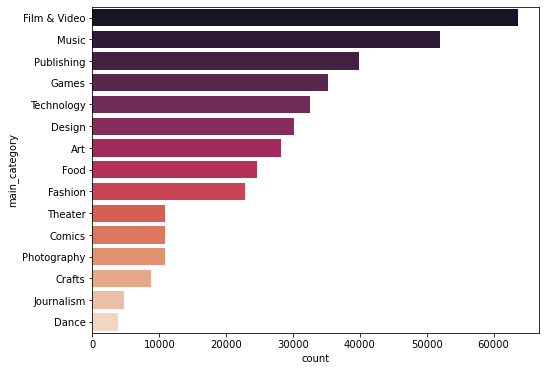

In [28]:
plot_order = df.groupby('main_category')['main_category'].count().sort_values(ascending=False).index.values
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(y='main_category', data=df, ax=ax, order=plot_order, palette="rocket")

#### 2.Now I'm going to show you a representation of the states en each category.

<AxesSubplot:xlabel='main_category', ylabel='count'>

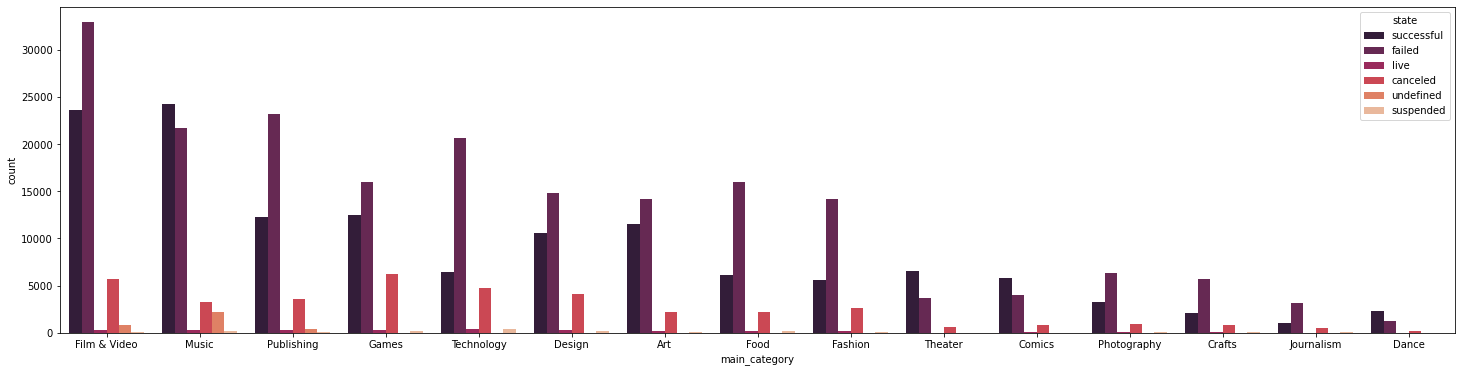

In [29]:
h_order = ['successful', 'failed', 'live', 'canceled', 'undefined', 'suspended']
fig, ax = plt.subplots(figsize=(25,6))
sns.countplot(x='main_category', hue='state', hue_order=h_order,  data=df, ax=ax, order=plot_order, palette="rocket")

#### 3,4,5. Questions

3. How many projects were created in 2018?
4. How many different categories are?
5. How many different countries have participated in Kickstarter?

In [30]:
p = df['ID'].nunique()
dc = df['main_category'].nunique()
dco = df['country'].nunique()

print('There are', p, "different projects")
print('There are', dc, "different categories")
print('There are', dco, "different countries")

There are 378661 different projects
There are 15 different categories
There are 23 different countries


#### 6. Show a resume of the state

In [31]:
df['state'].value_counts().sort_values(ascending=False)

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

In [32]:
(df['state'].value_counts()/len(df.index)*100).sort_values(ascending=False)

failed       52.21531
successful   35.37623
canceled     10.24109
undefined     0.94068
live          0.73918
suspended     0.48751
Name: state, dtype: float64

#### 7. The most sucesfull category. Counting categories.

In [33]:
df_suc =df[df['state'] == 'successful']
df_suc.groupby('main_category')['main_category'].count().sort_values(ascending=False)

main_category
Music           24197
Film & Video    23623
Games           12518
Publishing      12300
Art             11510
Design          10550
Theater          6534
Technology       6434
Food             6085
Comics           5842
Fashion          5593
Photography      3305
Dance            2338
Crafts           2115
Journalism       1012
Name: main_category, dtype: int64

In [34]:
(df_suc.groupby('main_category')['main_category'].count()/(df_suc['state'].count())*100).sort_values(ascending=False)

main_category
Music          18.06339
Film & Video   17.63490
Games           9.34486
Publishing      9.18212
Art             8.59237
Design          7.87572
Theater         4.87772
Technology      4.80307
Food            4.54254
Comics          4.36113
Fashion         4.17525
Photography     2.46723
Dance           1.74535
Crafts          1.57888
Journalism      0.75547
Name: main_category, dtype: float64

#### 8. Which category attract more backers?

For this I'm going to filter only failed and successful projects, because the others state will affect the calculation

In [35]:
df_clean = df[(df['state'] == 'successful') | (df['state'] == 'failed')]

I'm going to group by main category and calculate some statistics 

In [36]:
df_clean.groupby('main_category')['backers'].agg(['mean', 'median', 'sum']).sort_values(by=['mean'], ascending=False)

,mean,median,sum
main_category,,,
Games,382.10368,40.00000,10897979
Design,274.14170,34.00000,6953330
Technology,186.14695,7.00000,5035275
Comics,145.60832,46.00000,1438319
Film & Video,72.55427,15.00000,4101275
Fashion,68.44925,6.00000,1353584
Publishing,61.76583,9.00000,2189290
Food,58.95416,7.00000,1300175
Music,58.16359,22.00000,2672559


#### 9. Which categories have highest goals?

In [37]:
df_clean.groupby('main_category')['usd_goal_real'].agg(['mean', 'median', 'sum']).sort_values(by=['mean'], ascending=False)

,mean,median,sum
main_category,,,
Technology,98076.54281,18000.00000,2652970483.02000
Film & Video,76095.90535,6400.00000,4301473241.69000
Journalism,70098.39029,5000.00000,290838221.30000
Food,48167.92477,10000.00000,1062295412.97000
Art,39432.14071,2966.70000,1011079520.00000
Games,38945.84435,7500.00000,1110774426.64000
Design,38236.99468,10000.00000,969843133.14000
Theater,23133.02856,3101.35000,236928478.54000
Fashion,21886.66019,5500.00000,432808705.29000


#### 10. How the goal affects the success of the project?

<AxesSubplot:xlabel='goal', ylabel='usd_pledged_real'>

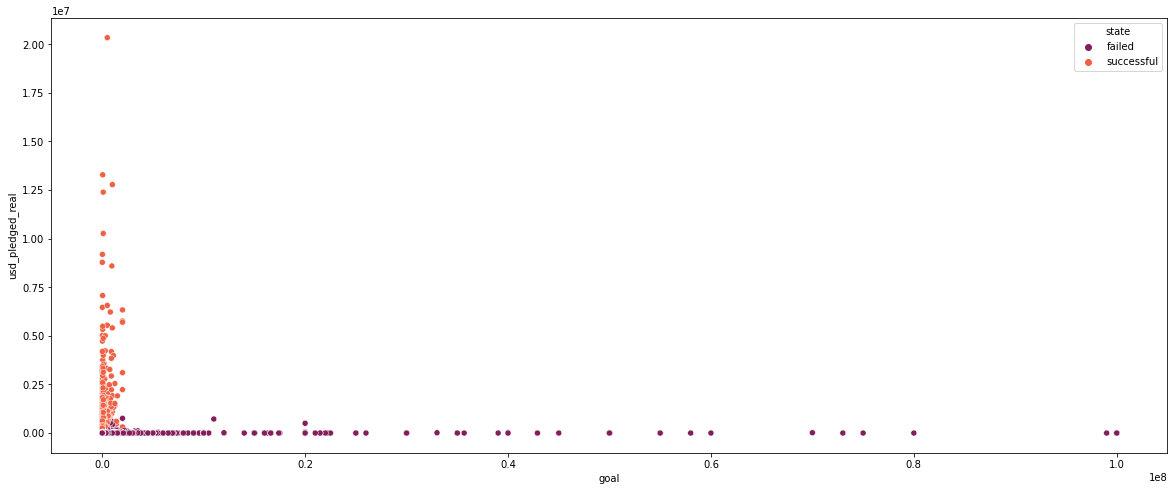

In [38]:
fig, ax_m1 = plt.subplots(figsize=(20,8))
sns.scatterplot(x='goal', y='usd_pledged_real', data=df_clean, hue='state', palette="rocket")

#### 11. Which is the project with the biggest goal that is successful?

In [39]:
df_suc.sort_values(by=['goal'], ascending=False)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real,Time,month
368573,947809001,Shenmue 3,Video Games,Games,USD,2015-07-18,2000000.00000,2015-06-16,6333295.77000,successful,69320,US,6333295.77000,2000000.00000,32,6
114585,1581905668,Ghost S1 MkII,Technology,Technology,SEK,2017-12-29,2000000.00000,2017-11-29,2588996.65000,successful,1260,SE,315423.57000,243664.72000,30,11
148585,1755266685,The Veronica Mars Movie Project,Narrative Film,Film & Video,USD,2013-04-13,2000000.00000,2013-03-13,5702153.38000,successful,91585,US,5702153.38000,2000000.00000,31,3
89481,1454565733,Bring Back MYSTERY SCIENCE THEATER 3000,Television,Film & Video,USD,2015-12-12,2000000.00000,2015-11-10,5764229.38000,successful,48270,US,5764229.38000,2000000.00000,32,11
171322,1871494789,WISH I WAS HERE,Narrative Film,Film & Video,USD,2013-05-24,2000000.00000,2013-04-24,3105473.10000,successful,46520,US,3105473.10000,2000000.00000,30,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171562,1872761549,Salvation: The Lotus Diary's (First Album) (Re...,Hip-Hop,Music,GBP,2014-08-13,1.00000,2014-07-14,1.00000,successful,1,GB,1.67000,1.67000,30,7
358886,898353932,Joe Avery : Grow a Garden,Country & Folk,Music,USD,2011-09-16,1.00000,2011-07-18,369.00000,successful,13,US,369.00000,1.00000,60,7
68964,1351052522,Revenge of the IoT Relay - Just an hour to go!,Gadgets,Technology,USD,2015-04-27,1.00000,2015-04-24,6316.00000,successful,109,US,6316.00000,1.00000,3,4
373796,974796951,David J - Lonely Chaplin,Classical Music,Music,USD,2015-10-11,1.00000,2015-09-01,30.00000,successful,4,US,30.00000,1.00000,40,9


In [40]:
df_suc.groupby('main_category')['goal'].agg(['mean', 'median', 'std', 'min', 'max']).sort_values(by=['mean'], ascending=False)

,mean,median,std,min,max
main_category,,,,,
Technology,28334.81903,10000.00000,57973.20199,1.00000,2000000.00000
Design,17869.36318,8000.00000,43095.79899,1.00000,1400000.00000
Games,15280.36923,5000.00000,56462.95437,1.00000,2000000.00000
Food,12177.78081,7500.00000,19249.46246,1.00000,500000.00000
Film & Video,11486.10940,5000.00000,35075.76721,1.00000,2000000.00000
Fashion,10527.92392,5000.00000,26871.69394,1.00000,1100000.00000
Journalism,9818.03205,3000.00000,22421.66684,1.00000,250000.00000
Photography,6644.39195,3000.00000,13775.49815,1.00000,400000.00000
Publishing,6427.31616,3000.00000,14361.75017,1.00000,400000.00000


#### 12. How many projects repeated and succeed more than one time? 

1. Filter by state, we only need successful projects (use df_suc, already filtered)
2. Group by name, and count the repeated projects
3. Group by the already counted projects, so we have the groups of how many projects succeed.

In [41]:
df_succ = (df_suc.groupby(['name'])['ID'].count()).to_frame()

In [42]:
df_succ.groupby(['ID'])['ID'].count()

ID
1    133222
2       298
3        34
4         4
5         4
Name: ID, dtype: int64

#### 13. Which is the most succesful country?

In [43]:
df_suc.groupby('country')['country'].count().sort_values(ascending=False)

country
US    109379
GB     12081
CA      4137
AU      2011
DE       937
FR       908
NL       617
SE       509
ES       492
NZ       448
IT       439
MX       396
DK       362
HK       216
IE       207
CH       187
SG       178
NO       163
BE       152
AT       107
LU        19
JP         7
EU         4
Name: country, dtype: int64

#### 14. Five projects with most backers which are sucessfull

In [44]:
df_suc.sort_values(by=['backers'], ascending=False).head(5)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real,Time,month
187652,1955357092,Exploding Kittens,Tabletop Games,Games,USD,2015-02-20,10000.00000,2015-01-20,8782571.99000,successful,219382,US,8782571.99000,10000.00000,31,1
75900,1386523707,Fidget Cube: A Vinyl Desk Toy,Product Design,Design,USD,2016-10-20,15000.00000,2016-08-30,6465690.30000,successful,154926,US,6465690.30000,15000.00000,51,8
292244,557230947,"Bring Reading Rainbow Back for Every Child, Ev...",Web,Technology,USD,2014-07-02,1000000.00000,2014-05-28,5408916.95000,successful,105857,US,5408916.95000,1000000.00000,35,5
148585,1755266685,The Veronica Mars Movie Project,Narrative Film,Film & Video,USD,2013-04-13,2000000.00000,2013-03-13,5702153.38000,successful,91585,US,5702153.38000,2000000.00000,31,3
182657,1929840910,Double Fine Adventure,Video Games,Games,USD,2012-03-14,400000.00000,2012-02-09,3336371.92000,successful,87142,US,3336371.92000,400000.00000,34,2


#### 15. Which main categories raise more money from successful campaigns

In [45]:
df_suc.groupby('main_category')['usd_pledged_real'].agg(['mean', 'sum']).sort_values(by=['sum'], ascending=False)

,mean,sum
main_category,,
Games,54228.75514,678835556.79000
Design,62858.52415,663157429.75000
Technology,93085.76222,598913794.11000
Film & Video,13951.87243,329585082.40000
Music,7338.13239,177560789.56000
Publishing,9436.91073,116074001.93000
Fashion,20286.55553,113462705.10000
Food,17349.39052,105571041.29000
Art,6971.89485,80246509.72000


In [46]:
pd.DataFrame(df.groupby('main_category')['usd_pledged_real'].sum().sort_values(ascending=False))

,usd_pledged_real
main_category,
Games,741327289.54000
Design,734220233.38000
Technology,688872493.68000
Film & Video,391555058.31000
Music,200318729.45000
Publishing,133575983.28000
Fashion,130335278.34000
Food,125806502.35000
Art,90680446.11000


#### 16. Which is the 5 most/less pledged projects which the state is sucessfull and what category are they?

In [47]:
df_suc.sort_values(by=['usd_pledged_real'], ascending=False)[['name', 'usd_pledged_real', 'main_category', 'state']]

,name,usd_pledged_real,main_category,state
157270,"Pebble Time - Awesome Smartwatch, No Compromises",20338986.27000,Design,successful
250254,COOLEST COOLER: 21st Century Cooler that's Act...,13285226.36000,Design,successful
216629,"Pebble 2, Time 2 + All-New Pebble Core",12779843.49000,Design,successful
289915,Kingdom Death: Monster 1.5,12393139.69000,Games,successful
282416,Pebble: E-Paper Watch for iPhone and Android,10266845.74000,Design,successful
...,...,...,...,...
309500,Finally Free TODAY!!!!,1.00000,Film & Video,successful
19251,SEALIONS iii,1.00000,Film & Video,successful
40079,The Laugh Heard Around the World,1.00000,Art,successful
89180,Spirituality From Absolute Zero,1.00000,Publishing,successful


#### 17. How the time affects the success of the project?

<AxesSubplot:xlabel='Time', ylabel='usd_pledged_real'>

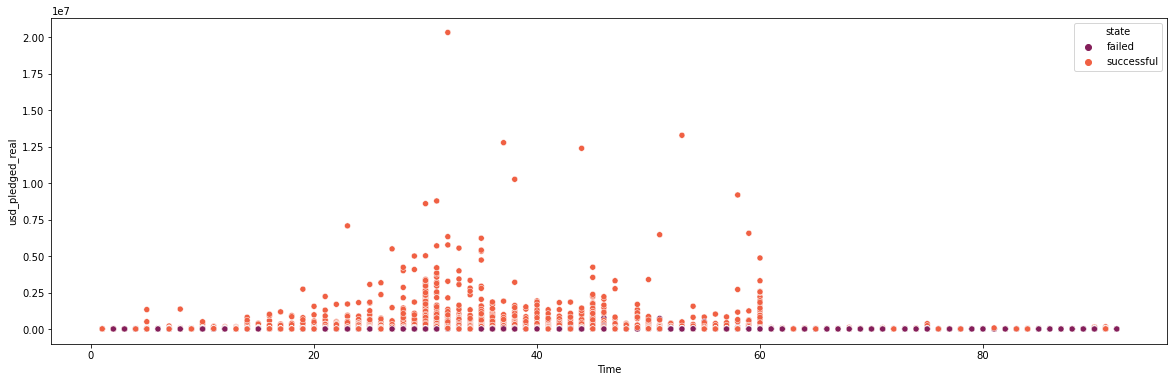

In [48]:
fig, ax_m1 = plt.subplots(figsize=(20,6))
sns.scatterplot(x='Time', y='usd_pledged_real', data=df_clean, hue='state', palette="rocket")

#### 18. Which month is more probable to be successfull?

<AxesSubplot:xlabel='month', ylabel='count'>

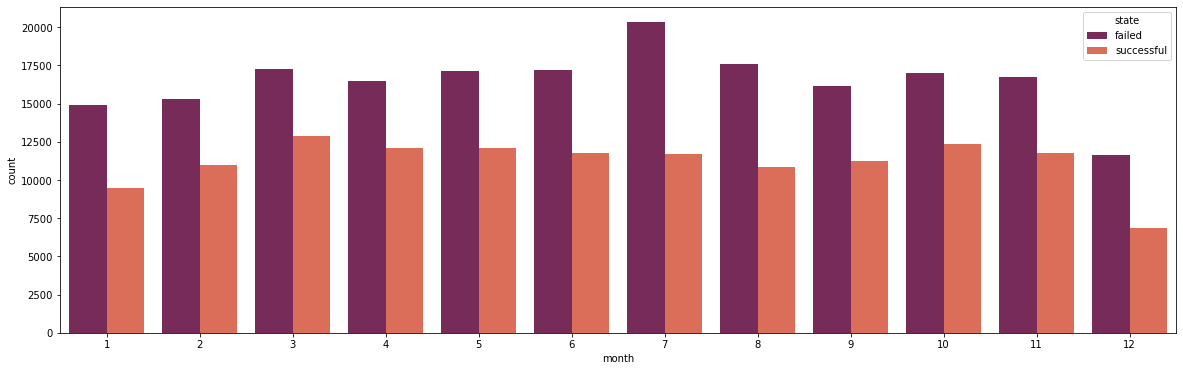

In [49]:
fig, ax_m1 = plt.subplots(figsize=(20,6))
sns.countplot(x='month', data=df_clean, hue='state', palette="rocket")

In [50]:
pd.DataFrame(df_clean.groupby(['month', 'state'])['launched'].count()).sort_values(by=['state', 'month'], ascending=False)

,,launched
month,state,
12,successful,6842
11,successful,11770
10,successful,12350
9,successful,11231
8,successful,10820
7,successful,11681
6,successful,11773
5,successful,12062
4,successful,12093
